# 데이터 분석

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
DATA_PATH = r"/data_in/"
data = pd.read_csv(DATA_PATH + 'ChatbotData .csv')

In [0]:
data.head()

,Q,A,label
0,12시 땡!,하루가 또 가네요.,0
1,1지망 학교 떨어졌어,위로해 드립니다.,0
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0
3,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0
4,PPL 심하네,눈살이 찌푸려지죠.,0


**문장 전체에 대한 분석**

1. 음절 단위
2. 어절 단위
3. 형태소 단위

In [0]:
sentences = list(data['Q']) + list(data['A'])

In [0]:
tokenized_sentences = [s.split() for s in sentences]
sent_len_by_token = [len(t) for t in tokenized_sentences]
sent_len_by_eumjeol = [len(s.replace(' ', '')) for s in sentences]

from konlpy.tag import Okt
okt=Okt()

morph_tokenized_sentences = [okt.morphs(s.replace(' ', '')) for s in sentences]
sent_len_by_morph = [len(t) for t in morph_tokenized_sentences]

Text(0, 0.5, 'Number of Sentences')

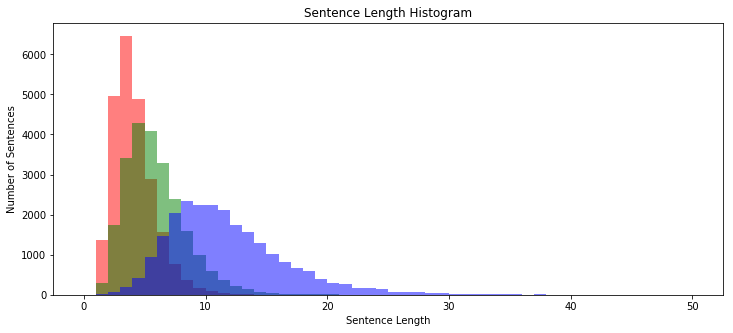

In [0]:
plt.figure(figsize=(12, 5))
plt.hist(sent_len_by_token, bins=50, range=[0,50], alpha=0.5, color= 'r', label='eojeol')
plt.hist(sent_len_by_morph, bins=50, range=[0,50], alpha=0.5, color='g', label='morph')
plt.hist(sent_len_by_eumjeol, bins=50, range=[0,50], alpha=0.5, color='b', label='eumjeol')
plt.title('Sentence Length Histogram')
plt.xlabel('Sentence Length')
plt.ylabel('Number of Sentences')

Text(0, 0.5, 'Number of Sentences')

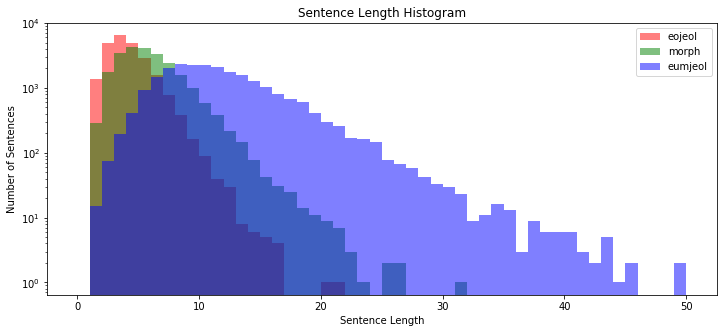

In [0]:
plt.figure(figsize=(12, 5))
plt.hist(sent_len_by_token, bins=50, range=[0,50], alpha=0.5, color='r', label='eojeol')
plt.hist(sent_len_by_morph, bins=50, range=[0,50], alpha=0.5, color='g', label='morph')
plt.hist(sent_len_by_eumjeol, bins=50, range=[0,50], alpha=0.5, color='b', label='eumjeol')
plt.yscale('log')
plt.title('Sentence Length Histogram')
plt.legend()
plt.xlabel('Sentence Length')
plt.ylabel('Number of Sentences')

In [0]:
# 어절 길이에 대한 통계값
print('어절 최대 길이: {}'.format(np.max(sent_len_by_token)))
print('어절 최소 길이: {}'.format(np.min(sent_len_by_token)))
print('어절 평균 길이: {:.2f}'.format(np.mean(sent_len_by_token)))
print('어절 길이 표준편차: {:.2f}'.format(np.std(sent_len_by_token)))
print('어절 중간 길이: {}'.format(np.median(sent_len_by_token)))
print('제1사분위 길이: {}'.format(np.percentile(sent_len_by_token, 25)))
print('제3사분위 길이: {}'.format(np.percentile(sent_len_by_token, 75)))

어절 최대 길이: 21
어절 최소 길이: 1
어절 평균 길이: 3.64
어절 길이 표준편차: 1.74
어절 중간 길이: 3.0
제1사분위 길이: 2.0
제3사분위 길이: 5.0


In [0]:
# 음절 길이에 대한 통계값
print('음절 최대 길이: {}'.format(np.max(sent_len_by_eumjeol)))
print('음절 최소 길이: {}'.format(np.min(sent_len_by_eumjeol)))
print('음절 평균 길이: {:.2f}'.format(np.mean(sent_len_by_eumjeol)))
print('음절 길이 표준편차: {:.2f}'.format(np.std(sent_len_by_eumjeol)))
print('음절 중간 길이: {}'.format(np.median(sent_len_by_eumjeol)))
print('제1사분위 길이: {}'.format(np.percentile(sent_len_by_eumjeol, 25)))
print('제3사분위 길이: {}'.format(np.percentile(sent_len_by_eumjeol, 75)))

음절 최대 길이: 57
음절 최소 길이: 1
음절 평균 길이: 11.31
음절 길이 표준편차: 4.98
음절 중간 길이: 10.0
제1사분위 길이: 8.0
제3사분위 길이: 14.0


In [0]:
# 형태소 길이에 대한 통계값
print('형태소 최대 길이: {}'.format(np.max(sent_len_by_morph)))
print('형태소 최소 길이: {}'.format(np.min(sent_len_by_morph)))
print('형태소 평균 길이: {:.2f}'.format(np.mean(sent_len_by_morph)))
print('형태소 길이 표준편차: {:.2f}'.format(np.std(sent_len_by_morph)))
print('형태소 중간 길이: {}'.format(np.median(sent_len_by_morph)))
print('제1사분위 길이: {}'.format(np.percentile(sent_len_by_morph, 25)))
print('제3사분위 길이: {}'.format(np.percentile(sent_len_by_morph, 75)))

형태소 최대 길이: 31
형태소 최소 길이: 1
형태소 평균 길이: 5.41
형태소 길이 표준편차: 2.56
형태소 중간 길이: 5.0
제1사분위 길이: 4.0
제3사분위 길이: 7.0


{'whiskers': [<matplotlib.lines.Line2D at 0x711e5d68>,
 'caps': [<matplotlib.lines.Line2D at 0x711c8438>,
 'boxes': [<matplotlib.lines.Line2D at 0x711e59e8>,
 'medians': [<matplotlib.lines.Line2D at 0x711c8ac8>,
 'fliers': [<matplotlib.lines.Line2D at 0x711c8eb8>,
 'means': [<matplotlib.lines.Line2D at 0x711c8e10>,
  <matplotlib.lines.Line2D at 0x7110b400>]}

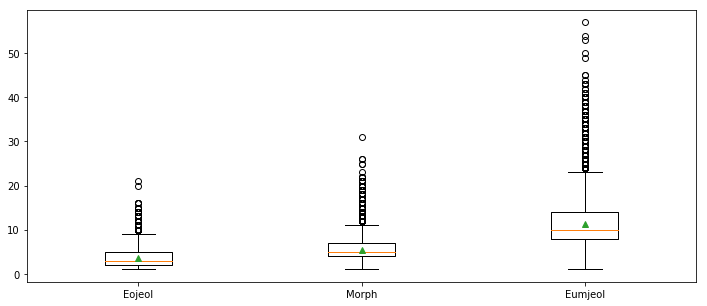

In [0]:
plt.figure(figsize=(12, 5))
plt.boxplot([sent_len_by_token, sent_len_by_morph, sent_len_by_eumjeol],
            labels=['Eojeol', 'Morph', 'Eumjeol'],
            showmeans=True)

In [0]:
query_sentences = list(data['Q'])
answer_sentences = list(data['A'])

query_morph_tokenized_sentences = [okt.morphs(s.replace(' ', '')) for s in query_sentences]
query_sent_len_by_morph = [len(t) for t in query_morph_tokenized_sentences]

answer_motph_tokenized_sentences = [okt.morphs(s.replace(' ', '')) for s in answer_sentences]
answer_sent_len_by_morph = [len(t) for t in answer_motph_tokenized_sentences]

Text(0, 0.5, 'Number of Queries')

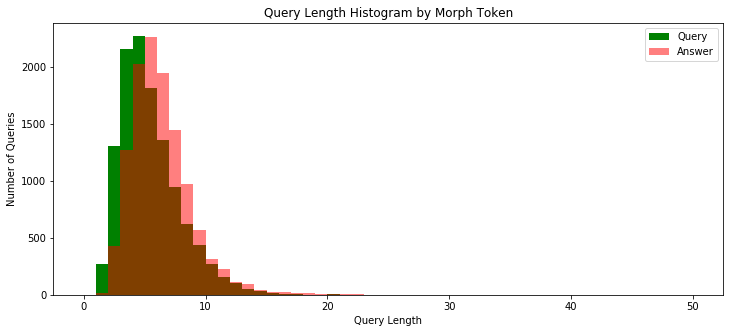

In [0]:
plt.figure(figsize=(12, 5))
plt.hist(query_sent_len_by_morph, bins=50, range=[0, 50], color='g', label='Query')
plt.hist(answer_sent_len_by_morph, bins=50, range=[0, 50], color='r', alpha=0.5, label='Answer')
plt.legend()
plt.title('Query Length Histogram by Morph Token')
plt.xlabel('Query Length')
plt.ylabel('Number of Queries')

Text(0, 0.5, 'Number of Queries')

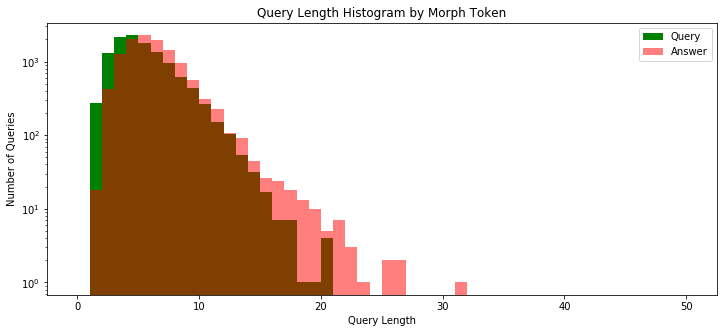

In [0]:
plt.figure(figsize=(12, 5))
plt.hist(query_sent_len_by_morph, bins=50, range=[0, 50], color='g', label='Query')
plt.hist(answer_sent_len_by_morph, bins=50, range=[0, 50], color='r', alpha=0.5, label='Answer')
plt.legend()
plt.yscale('log', nonposy='clip')
plt.title('Query Length Histogram by Morph Token')
plt.xlabel('Query Length')
plt.ylabel('Number of Queries')

In [0]:
print('형태소 최대길이: {}'.format(np.max(query_sent_len_by_morph)))
print('형태소 최소길이: {}'.format(np.min(query_sent_len_by_morph)))
print('형태소 평균길이: {:.2f}'.format(np.mean(query_sent_len_by_morph)))
print('형태소 길이 표준편차: {:.2f}'.format(np.std(query_sent_len_by_morph)))
print('형태소 중간길이: {}'.format(np.median(query_sent_len_by_morph)))
print('형태소 1/4 퍼센타일 길이: {}'.format(np.percentile(query_sent_len_by_morph, 25)))
print('형태소 3/4 퍼센타일 길이: {}'.format(np.percentile(query_sent_len_by_morph, 75)))

형태소 최대길이: 20
형태소 최소길이: 1
형태소 평균길이: 4.95
형태소 길이 표준편차: 2.48
형태소 중간길이: 4.0
형태소 1/4 퍼센타일 길이: 3.0
형태소 3/4 퍼센타일 길이: 6.0


In [0]:
print('형태소 최대길이: {}'.format(np.max(answer_sent_len_by_morph)))
print('형태소 최소길이: {}'.format(np.min(answer_sent_len_by_morph)))
print('형태소 평균길이: {:.2f}'.format(np.mean(answer_sent_len_by_morph)))
print('형태소 길이 표준편차: {:.2f}'.format(np.std(answer_sent_len_by_morph)))
print('형태소 중간길이: {}'.format(np.median(answer_sent_len_by_morph)))
print('형태소 1/4 퍼센타일 길이: {}'.format(np.percentile(answer_sent_len_by_morph, 25)))
print('형태소 3/4 퍼센타일 길이: {}'.format(np.percentile(answer_sent_len_by_morph, 75)))

형태소 최대길이: 31
형태소 최소길이: 1
형태소 평균길이: 5.87
형태소 길이 표준편차: 2.55
형태소 중간길이: 5.0
형태소 1/4 퍼센타일 길이: 4.0
형태소 3/4 퍼센타일 길이: 7.0


{'whiskers': [<matplotlib.lines.Line2D at 0x73c3d978>,
 'caps': [<matplotlib.lines.Line2D at 0x73c3dfd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x73c3d588>,
 'medians': [<matplotlib.lines.Line2D at 0x73c546a0>,
 'fliers': [<matplotlib.lines.Line2D at 0x73c549e8>,
 'means': []}

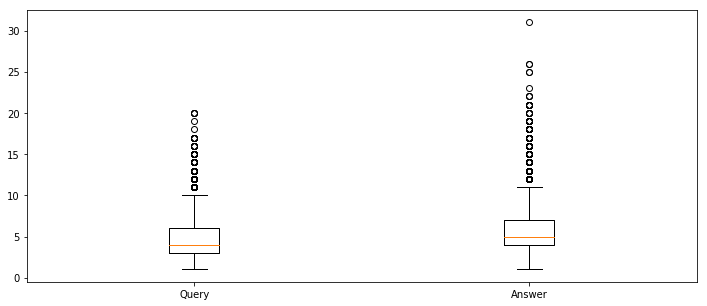

In [0]:
plt.figure(figsize=(12, 5))
plt.boxplot([query_sent_len_by_morph, answer_sent_len_by_morph],
            labels=['Query', 'Answer'])

## 데이터 어휘 빈도 분석

의미상 중요한 명사, 형용사, 동사만 사용

In [0]:
okt.pos('오늘밤은유난히덥구나')

[('오늘밤', 'Noun'), ('은', 'Josa'), ('유난히', 'Adverb'), ('덥구나', 'Adjective')]

In [0]:
query_NVA_token_sentences = list()
answer_NVA_token_sentences = list()

for s in query_sentences:
    for token, tag in okt.pos(s.replace(' ', '')):
        if tag == 'Noun' or tag == 'Verb' or tag == 'Adjective':
            query_NVA_token_sentences.append(token)
            
for s in answer_sentences:
    for token, tag in okt.pos(s.replace(' ', '')):
        if tag == 'Noun' or tag == 'Verb' or tag == 'Adjective':
            answer_NVA_token_sentences.append(token)
            
query_NVA_token_sentences = ' '.join(query_NVA_token_sentences)
answer_NVA_token_sentences = ' '.join(answer_NVA_token_sentences)

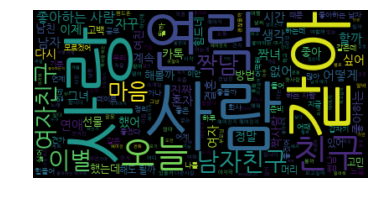

In [0]:
from wordcloud import WordCloud

query_wordcloud = WordCloud(font_path = DATA_PATH + 'NanumGothic.ttf').generate(query_NVA_token_sentences)

plt.imshow(query_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

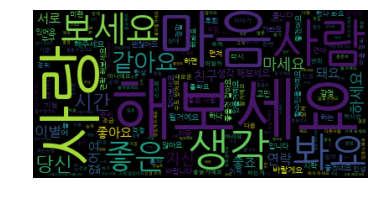

In [0]:
answer_wordcloud = WordCloud(font_path= DATA_PATH + 'NanumGothic.ttf').generate(answer_NVA_token_sentences)

plt.imshow(answer_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()